<a href="https://colab.research.google.com/github/nipun1264/CNN-SVD-ImageCompression/blob/main/CNN_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist
from PIL import Image
import numpy
from PIL import Image
from numpy import asarray
import cv2
import os
import random
import tensorflow as tf
import keras

In [32]:
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, y_train), (x_test, y_test) =tf.keras.datasets.cifar10.load_data()

#x=mnist.load_data()
#plt.imshow(x_train[56])


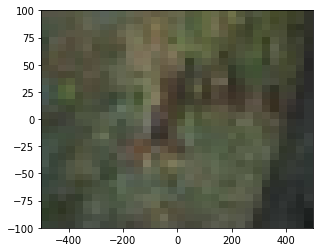

In [33]:
# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
#plt.imshow(x_train[10])
plt.imshow(x_train[10], origin='lower', extent=[-500, 500, -100, 100], aspect=4)
plt.show()


### **For MNIST data**

In [34]:
# reshape in the input data for the model
#x_train = x_train.reshape(len(x_train), 28, 28, 1)
#x_test = x_test.reshape(len(x_test), 28, 28, 1)
#x_test.shape
     

In [35]:
x_train = x_train.reshape(len(x_train), 32, 32, 3)
x_test = x_test.reshape(len(x_test), 32, 32, 3)
x_test.shape

(10000, 32, 32, 3)

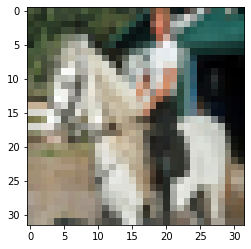

In [36]:
# randomly select input image
index = 56
# plot the image
plt.imshow(x_test[index])



In [37]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(32, 32, 3)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(3, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2D  (None, 16, 16, 16)       0

In [38]:
# train the model
model.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/20
196/196 [==============================] - 12s 21ms/step - loss: 0.5950 - val_loss: 0.5750
Epoch 2/20
196/196 [==============================] - 3s 16ms/step - loss: 0.5707 - val_loss: 0.5687
Epoch 3/20
196/196 [==============================] - 3s 16ms/step - loss: 0.5667 - val_loss: 0.5663
Epoch 4/20
196/196 [==============================] - 3s 16ms/step - loss: 0.5648 - val_loss: 0.5648
Epoch 5/20
196/196 [==============================] - 3s 18ms/step - loss: 0.5636 - val_loss: 0.5639
Epoch 6/20
196/196 [==============================] - 3s 16ms/step - loss: 0.5628 - val_loss: 0.5634
Epoch 7/20
196/196 [==============================] - 3s 16ms/step - loss: 0.5621 - val_loss: 0.5628
Epoch 8/20
196/196 [==============================] - 3s 17ms/step - loss: 0.5616 - val_loss: 0.5624
Epoch 9/20
196/196 [==============================] - 3s 17ms/step - loss: 0.5611 - val_loss: 0.5621
Epoch 10/20
196/196 [==============================] - 3s 16ms/step - loss: 0.5607 - val_l

In [ ]:
# predict the results from model (get compressed images)
pred = model.predict(x_test)
     

313/313 [==============================] - 1s 3ms/step


42


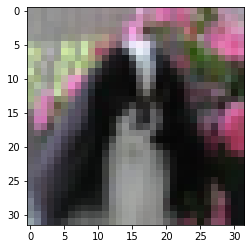

In [ ]:
# randomly select input image
index = 42
# plot the image
plt.imshow(x_test[index])
print(index)

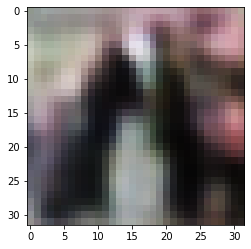

In [ ]:
plt.imshow(pred[index])

 The ORIGINAL image

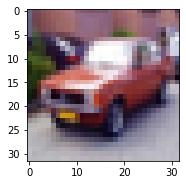

In [ ]:
index = 759
# display original image
ax = plt.subplot(1, 2, 1)
#plt.imshow(x_test[index].reshape(28,28),cmap='gray')
plt.imshow(x_test[index])



The COMPRESSED image(After CNN)

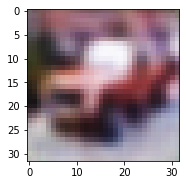

In [ ]:
ax = plt.subplot(1, 2, 2)
#plt.imshow(pred[index].reshape(28,28),cmap='gray')
plt.imshow(pred[index])
samplx=pred[index]


## SVD Model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

mypic=plt.imread("1.jpg")
plt.imshow(mypic)

mypic_red=mypic[:,:,0]
mypic_green=mypic[:,:,1]
mypic_blue=mypic[:,:,2]


U_red, s_red, V_red=np.linalg.svd(mypic_red)  #here we compute SVD of the matrix of the 1399 X 1920 matrix of red components
U_green, s_green, V_green=np.linalg.svd(mypic_green)
U_blue, s_blue, V_blue=np.linalg.svd(mypic_blue)


def compress(rank):
    compress_red=U_red[:, :rank]@ np.diag(s_red[:rank])@V_red[:rank, :] #partial spectral decomposition - take first rank number of singular values/vectors
    compress_red=compress_red.astype(int)
    
    compress_blue=U_blue[:, :rank] @ np.diag(s_blue[:rank])@V_blue[:rank, :]
    compress_blue=compress_blue.astype(int)

    compress_green=U_green[:, :rank]@ np.diag(s_green[:rank])@V_green[:rank, :]
    compress_green=compress_green.astype(int)

    compressed_array=np.stack((compress_red,  compress_green, compress_blue), axis=2)
    
    rows,cols = np.shape(mypic_red)
    compression_ratio = 100*rank*(rows + cols+1)/(rows * cols)
    print("Compression percent", compression_ratio)
    plt.imshow(compressed_array)
    



In [ ]:
compress(20)

In [ ]:
compress(70)

In [ ]:
compress(150)

In [ ]:
compress(300)

In [ ]:
from ipywidgets import interact

interact(compress, rank=(1,600))

In [ ]:
from skimage.metrics import structural_similarity
import cv2

#Works well with images of different dimensions
def orb_sim(img1, img2):
  # SIFT is no longer available in cv2 so using ORB
  orb = cv2.ORB_create()

  # detect keypoints and descriptors
  kp_a, desc_a = orb.detectAndCompute(img1, None)
  kp_b, desc_b = orb.detectAndCompute(img2, None)

  # define the bruteforce matcher object
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
  #perform matches. 
  matches = bf.match(desc_a, desc_b)
  #Look for similar regions with distance < 50. Goes from 0 to 100 so pick a number between.
  similar_regions = [i for i in matches if i.distance < 50]  
  if len(matches) == 0:
    return 0
  return len(similar_regions) / len(matches)


#Needs images to be same dimensions
def structural_sim(img1, img2):

  sim, diff = structural_similarity(img1, img2, full=True)
  return sim

img1 = cv2.imread('/content/1.jpg', 0)
img3 = cv2.imread('/content/3.jpg', 0)

#img1 = cv2.imread('/content/orginal2.png', 0)  # 714 x 901 pixels
#img2 = cv2.imread('/content/Compressed2.png', 0)  # 714 x 901 pixels
#img3 = cv2.imread('/content/original.png', 0)  # 203 x 256 pixels
#img4 = cv2.imread('/content/compressed.png', 0)  # 203 x 256 pixels

orb_similarity = orb_sim(img1, img3)  #1.0 means identical. Lower = not similar

print("Similarity using ORB is: ", orb_similarity)
#Resize for SSIM
from skimage.transform import resize
img5 = resize(img3, (img1.shape[0], img1.shape[1]), anti_aliasing=True, preserve_range=True)

ssim = structural_sim(img1, img5) #1.0 means identical. Lower = not similar
print("Similarity using SSIM is: ", ssim)